# Learning Nilearn 

In [2]:
# Import relevant libraries

import numpy as np 
import os  #The OS module in Python provides functions for interacting with the operating system

# Visualization modules 
import seaborn as sns  
import matplotlib.pyplot as plt

## Nilearn Useful Libraries

In [3]:
import nilearn
from nilearn.datasets import MNI152_FILE_PATH
from nilearn import plotting
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_anat, plot_img

# If thresholded images are required
from nilearn.glm import threshold_stats_img
# To generate cluster tables
from nilearn.reporting import get_clusters_table


In [4]:
# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: %r' % MNI152_FILE_PATH)

Path to MNI152 template: 'C:\\Users\\suruc\\AppData\\Roaming\\Python\\Python38\\site-packages\\nilearn\\datasets\\data\\mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz'


## Different types of Visualization

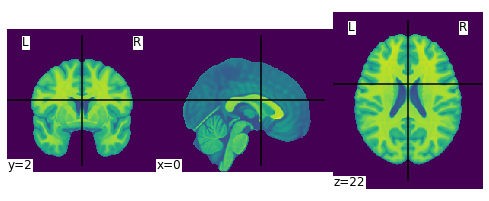

In [5]:
# Example of plot_img
plot_img(MNI152_FILE_PATH)

In [6]:
# Handling data for Subj 1

filtered_func_data =image.load_img('C:\\Users\\suruc\\Desktop\\fMRI_temp\\brainomics_data_fixed\\S01\\raw_fMRI_raw_bold_brain.feat\\filtered_func_data.nii.gz')
thresh_zstat1 ='C:\\Users\\suruc\\Desktop\\fMRI_temp\\brainomics_data_fixed\\S01\\raw_fMRI_raw_bold_brain.feat\\thresh_zstat1.nii.gz'
mean_func ='C:\\Users\\suruc\\Desktop\\fMRI_temp\\brainomics_data_fixed\\S01\\raw_fMRI_raw_bold_brain.feat\\mean_func.nii.gz'

In [7]:
# Check Shape of the 4D data
print(filtered_func_data.shape)

(64, 64, 40, 128)


### Plot time-series

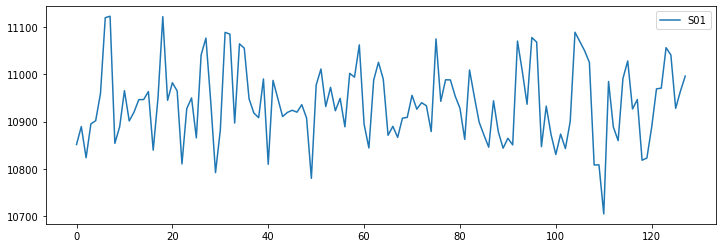

In [8]:
# Plot the original timecourse of a random voxel
x, y, z = [31, 14, 7]
plt.figure(figsize=(12, 4))
plt.plot(np.transpose(filtered_func_data.get_fdata()[x, y, z, :]))
plt.legend(['S01']);

### Interactive maps

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



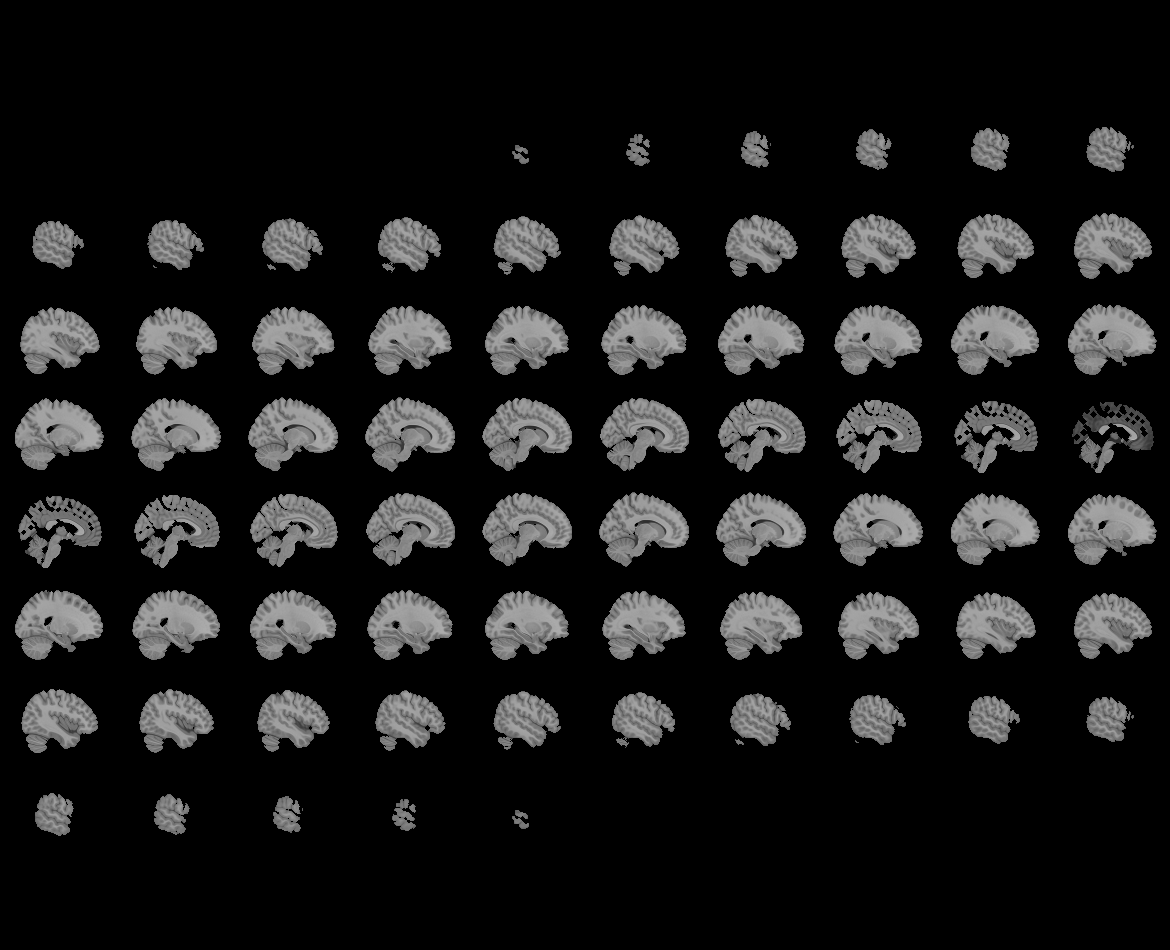
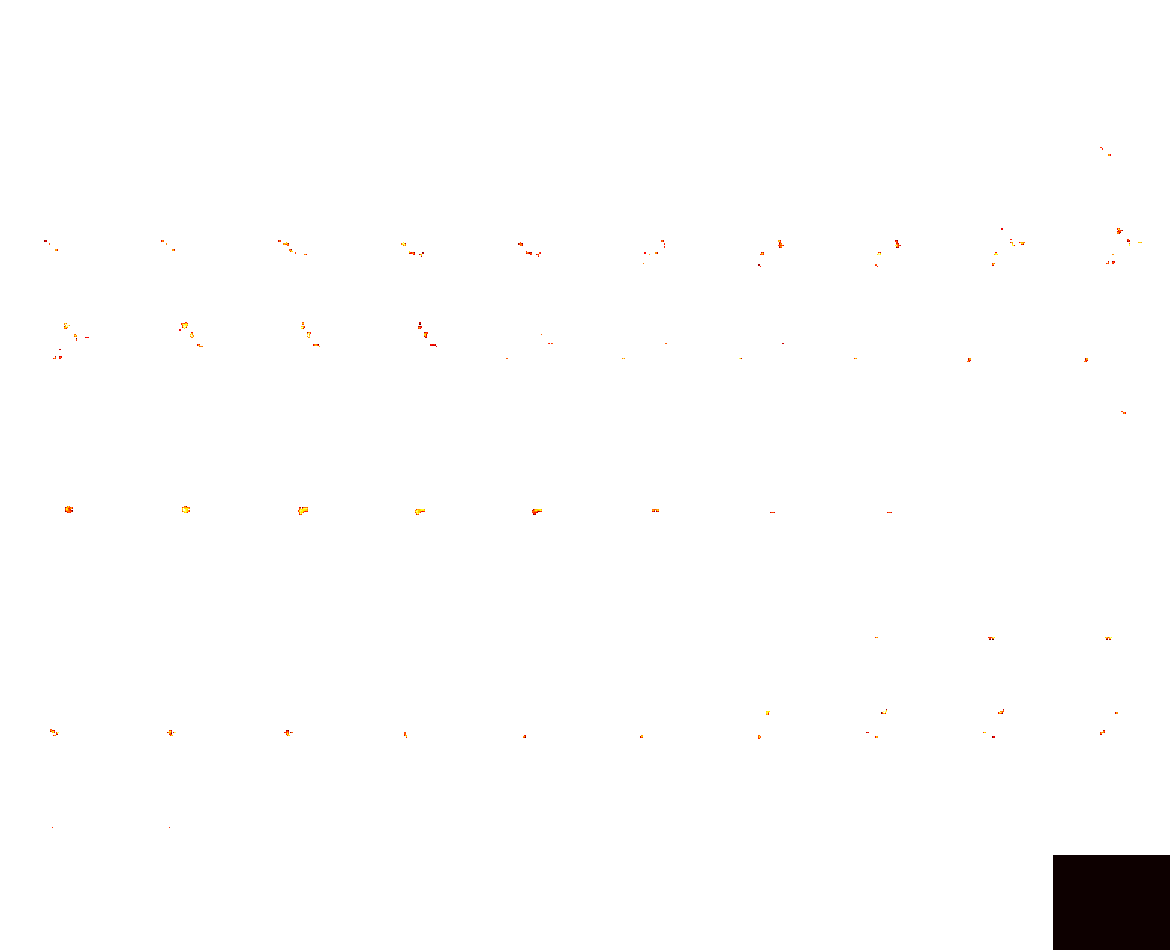

In [9]:
# Interactive map
plotting.view_img(thresh_zstat1)

### Threshold Maps with different  corrections

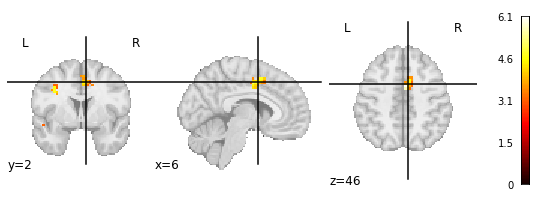

In [10]:
# With default options
plot_stat_map(thresh_zstat1)

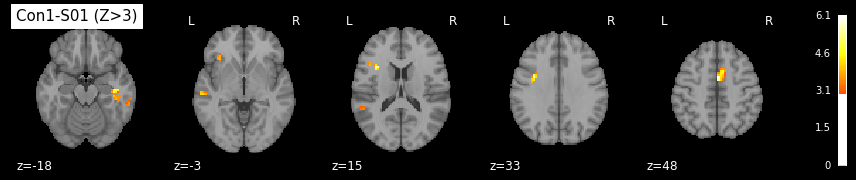

In [11]:
# With Threshold
plot_stat_map(thresh_zstat1, threshold=3.0,
              display_mode='z', cut_coords=5, black_bg=True,
              title='Con1-S01 (Z>3)')
plt.show()

Uncorrected p<0.001 threshold: 1.960


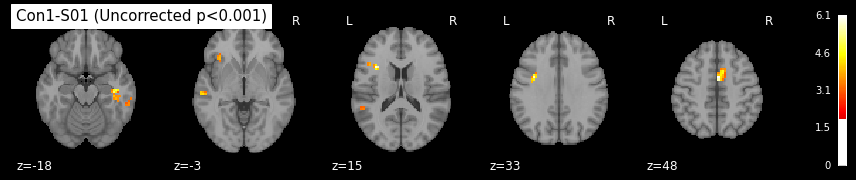

In [12]:
# Uncorrected
_, threshold = threshold_stats_img(thresh_zstat1, alpha=.05, height_control='fpr')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)
plot_stat_map(thresh_zstat1, threshold=threshold,
              display_mode='z', cut_coords=5, black_bg=True,
              title='Con1-S01 (Uncorrected p<0.001)')
plt.show()

Bonferroni-corrected, p<0.05 threshold: 3.780


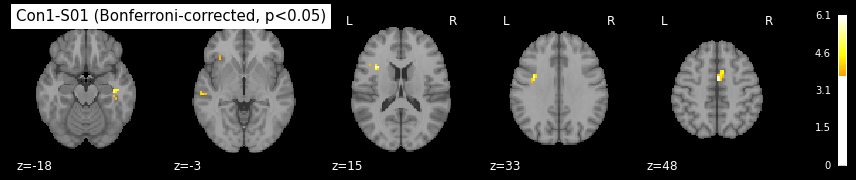

In [13]:
# Bonferroni-corrected
_, threshold = threshold_stats_img(
    thresh_zstat1, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plot_stat_map(thresh_zstat1, threshold=threshold,
              display_mode='z', cut_coords=5, black_bg=True,
              title='Con1-S01 (Bonferroni-corrected, p<0.05)')
plt.show()

False Discovery rate = 0.05 threshold: 3.101


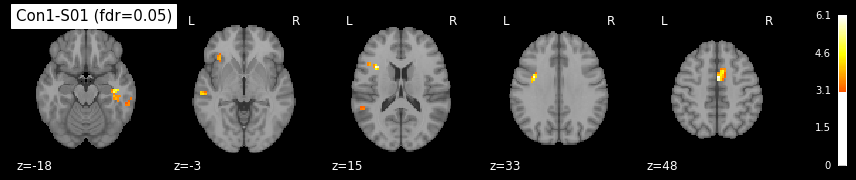

In [14]:
# FDR-corrected
_, threshold = threshold_stats_img(thresh_zstat1, alpha=.05, height_control='fdr')
print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
plot_stat_map(thresh_zstat1, threshold=threshold,
              display_mode='z', cut_coords=5, black_bg=True,
              title='Con1-S01 (fdr=0.05)')
plt.show()

Discard isolated voxels (aka “small clusters”) from these images. It is possible to generate a thresholded map with small clusters removed by providing a cluster_threshold argument. Here clusters smaller than 10 voxels will be discarded.


False Discovery rate = 0.05 threshold: 3.101


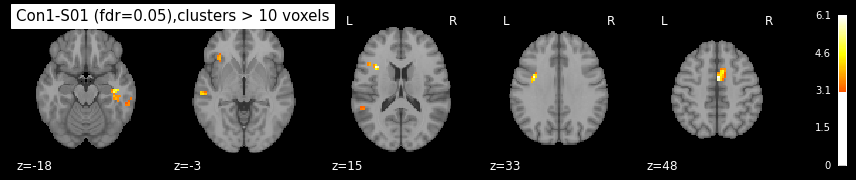

In [15]:
# FDR-corrected
_, threshold = threshold_stats_img(thresh_zstat1, alpha=.05, height_control='fdr', cluster_threshold=10)
print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
plot_stat_map(thresh_zstat1, threshold=threshold,
              display_mode='z', cut_coords=5, black_bg=True,
              title='Con1-S01 (fdr=0.05),clusters > 10 voxels')
plt.show()

In [16]:
table = get_clusters_table(thresh_zstat1, stat_threshold=threshold,
                           cluster_threshold=10)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,3.0,0.0,48.0,6.146447,1539
1,1a,9.0,6.0,48.0,4.669861,
2,2,-36.0,0.0,36.0,5.449546,351
3,3,-33.0,15.0,21.0,4.820985,108
4,4,-51.0,-30.0,9.0,4.707706,297
5,5,-36.0,12.0,15.0,4.594493,54
6,6,45.0,-30.0,-21.0,3.831120,27
7,7,-45.0,21.0,12.0,3.759672,54
8,8,-45.0,21.0,3.0,3.501677,27
9,9,-45.0,27.0,6.0,3.481848,54


### Threshold Maps with FDR error correction for Group results

In [17]:
# Handling data for Group Contrast 1

thresh_zstat_gc1 ='C:\\Users\\suruc\\Desktop\\fMRI_temp\\brainomics_data_fixed\\G90_Randomize+.gfeat\\cope1.feat\\thresh_zstat1.nii.gz'


False Discovery rate = 0.05 threshold: 2.097


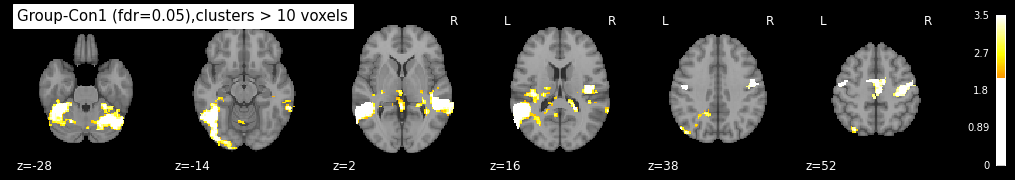

In [18]:
# FDR-corrected
_, threshold_C1 = threshold_stats_img(thresh_zstat_gc1, alpha=.05, height_control='fdr', cluster_threshold=10)
print('False Discovery rate = 0.05 threshold: %.3f' % threshold_C1)
plot_stat_map(thresh_zstat_gc1, threshold=threshold_C1,
              display_mode='z', cut_coords=6, black_bg=True,
              title='Group-Con1 (fdr=0.05),clusters > 10 voxels')
plt.show()

## Cluster Results

In [19]:
table_gc1 = get_clusters_table(thresh_zstat_gc1, stat_threshold=threshold_C1,
                           cluster_threshold=10)
table_gc1

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-16.0,-44.0,10.0,3.540119,16560
1,1a,-4.0,-26.0,6.0,3.540119,
2,1b,-2.0,-40.0,2.0,3.540119,
3,1c,-4.0,-54.0,10.0,3.540119,
4,2,56.0,-12.0,48.0,3.540119,10184
5,2a,6.0,-10.0,46.0,3.540119,
6,2b,6.0,-20.0,52.0,3.540119,
7,2c,2.0,-6.0,50.0,3.540119,
8,3,26.0,-40.0,-30.0,3.540119,7728
9,3a,12.0,-76.0,-26.0,3.540119,


In [20]:
# If needed save the file at relevant place

table_gc1.to_csv('table.csv')


### Glass brain visualization

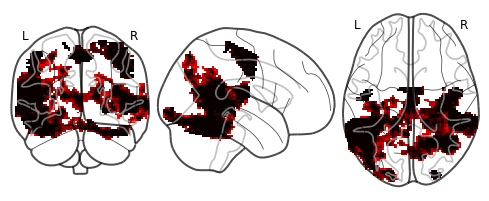

In [21]:
## Glass Maps with FDR error correction for Group results
plotting.plot_glass_brain(thresh_zstat_gc1, threshold=threshold_C1)
plotting.show()

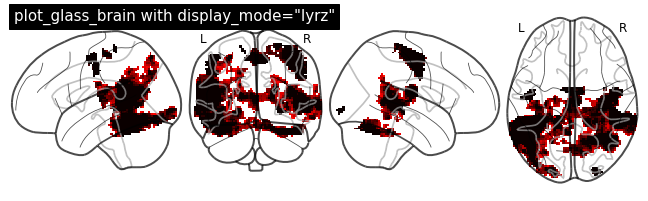

In [22]:
plotting.plot_glass_brain(thresh_zstat_gc1,
                          title='plot_glass_brain with display_mode="lyrz"',
                          display_mode='lyrz', threshold=threshold_C1)

plotting.show()

# Retrieving the atlas data

In [23]:
from nilearn import datasets

dataset_ho = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
dataset_ju = datasets.fetch_atlas_juelich('maxprob-thr0-1mm')

atlas_ho_filename = dataset_ho.filename
atlas_ju_filename = dataset_ju.filename

print('Atlas ROIs are located at: %s' % atlas_ho_filename)
print('Atlas ROIs are located at: %s' % atlas_ju_filename)

Atlas ROIs are located at: <class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown

C:\Users\suruc\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\displays\_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


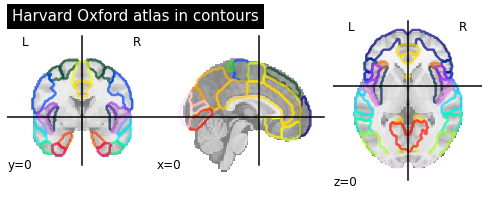

In [24]:
plotting.plot_roi(atlas_ho_filename, view_type='contours',
                  title="Harvard Oxford atlas in contours")
plotting.show()

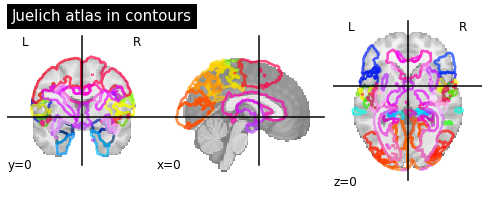

In [25]:
plotting.plot_roi(atlas_ju_filename, view_type='contours',
                  title="Juelich atlas in contours")
plotting.show()

## Fetching probabilistic atlas - MSDL atlas

In [26]:
atlas_data = datasets.fetch_atlas_msdl()
atlas_filename = atlas_data.maps

C:\Users\suruc\anaconda3\lib\site-packages\numpy\ma\core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


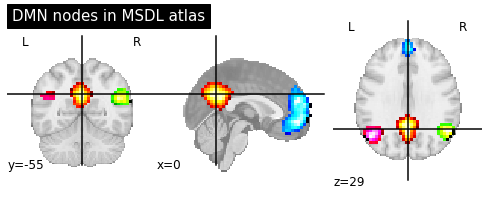

In [27]:
# First plot the map for the PCC: index 4 in the atlas
display = plot_stat_map(image.index_img(atlas_filename, 4),
                                 colorbar=False,
                                 title="DMN nodes in MSDL atlas")

# Now add as an overlay the maps for the ACC and the left and right
# parietal nodes
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_green)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_pink)

plotting.show()

In [28]:
pwd

'C:\\Users\\suruc\\Dropbox\\Suruchi\\Research\\fMRI_data'

In [29]:
from atlasreader import create_output


The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



In [31]:
create_output(thresh_zstat_gc1, cluster_extent=10,voxel_thresh=threshold_C1)


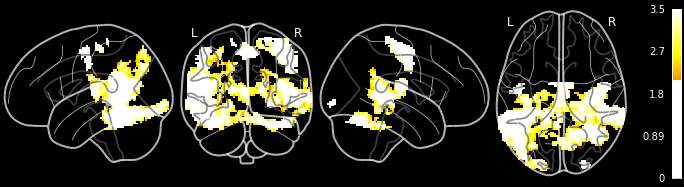

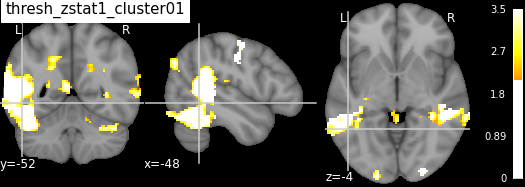

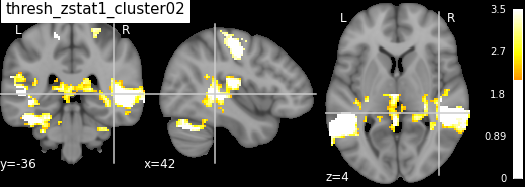

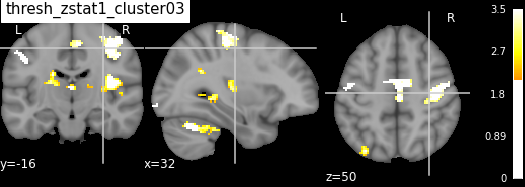

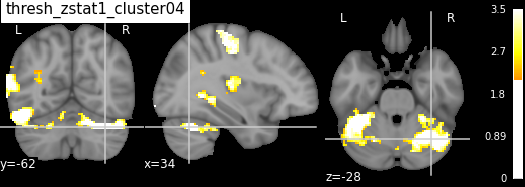

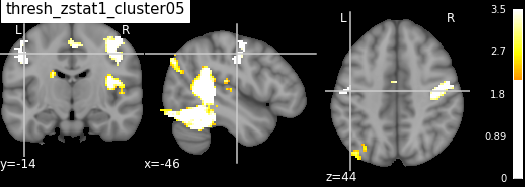

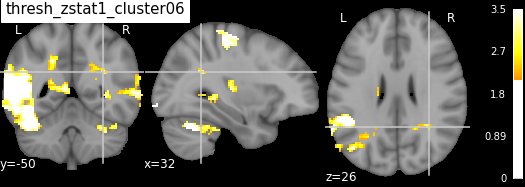

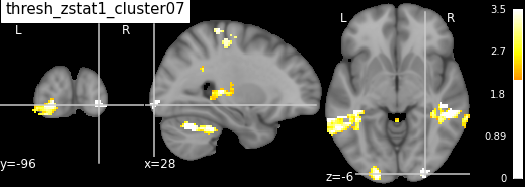

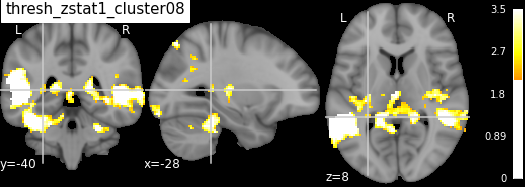

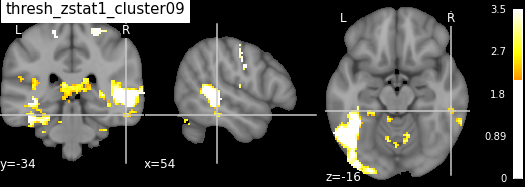

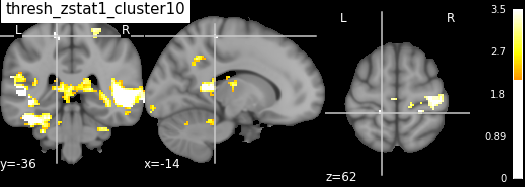

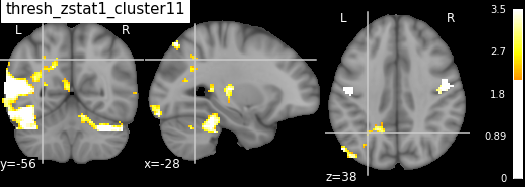

In [32]:
import pandas as pd 
out_file_atls = pd.read_csv('C:\\Users\\suruc\\Desktop\\fMRI_temp\\brainomics_data_fixed\\G90_Randomize+.gfeat\\cope1.feat\\thresh_zstat1_peaks.csv')

In [35]:
out_file_atls

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,-48,-52,-4,0.00000,49680,Temporal_Mid_L,Left-Cerebral-White-Matter,12.0% Left_Middle_Temporal_Gyrus_temporooccipi...
1,2,42,-36,4,3.54012,29704,Temporal_Sup_R,Right-Cerebral-White-Matter,5.0% Right_Supramarginal_Gyrus_posterior_division
2,3,32,-16,50,0.00000,11616,no_label,Right-Cerebral-White-Matter,15.0% Right_Precentral_Gyrus
3,4,34,-62,-28,3.54012,9056,Cerebelum_6_R,Right-Cerebellum-Cortex,0% no_label
4,5,-46,-14,44,3.54012,1272,Postcentral_L,Left-Cerebral-White-Matter,47.0% Left_Precentral_Gyrus; 19.0% Left_Postce...
5,6,32,-50,26,3.35279,488,no_label,Right-Cerebral-White-Matter,0% no_label
6,7,28,-96,-6,3.54012,368,Occipital_Inf_R,Right-Cerebral-White-Matter,65.0% Right_Occipital_Pole
7,8,-28,-40,8,3.15590,224,no_label,Left-Cerebral-White-Matter,35.0% Left_Lateral_Ventrical
8,9,54,-34,-16,2.98888,192,Temporal_Inf_R,Right-Cerebral-White-Matter,26.0% Right_Inferior_Temporal_Gyrus_posterior_...
9,10,-14,-36,62,3.54012,112,no_label,Left-Cerebral-White-Matter,26.0% Left_Postcentral_Gyrus; 13.0% Left_Prece...
